In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [101]:
data_set = pd.read_csv('INTELLECT.csv', na_values='ND')

In [102]:
data_set.shape

(1513, 7)

In [103]:
data_set.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,12/18/2014,64.870583,68.102409,64.870583,68.102409,68.102409,947441
1,12/19/2014,71.474739,71.474739,71.474739,71.474739,71.474739,64601
2,12/22/2014,75.034424,75.034424,69.507545,70.819008,70.819008,8076062
3,12/23/2014,71.193710,74.331856,67.306160,68.008728,68.008728,18978143
4,12/24/2014,67.493515,71.381065,66.697266,71.381065,71.381065,905139


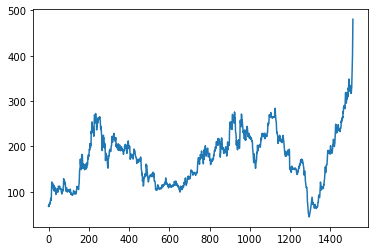

In [105]:
plt.plot(data_set['Adj Close'])

In [131]:
df=data_set['Adj Close']

In [120]:
df

0        68.102409
1        71.474739
2        70.819008
3        68.008728
4        71.381065
           ...    
1508    362.149994
1509    380.250000
1510    399.250000
1511    450.100006
1512    480.100006
Name: Adj Close, Length: 1513, dtype: float64

In [132]:
df = np.array(df).reshape(-1,1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df = scaler.fit_transform(df)

print(df)

[[0.05342311]
 [0.06117114]
 [0.05966458]
 ...
 [0.81424468]
 [0.9310741 ]
 [1.        ]]


In [133]:
train = df[:1300]
test = df[1300:]

print(train.shape)
print(test.shape)

(1300, 1)
(213, 1)


In [134]:
def get_data(data, look_back):
    data_x,  data_y = [],[]
    for i in range(len(data)-look_back-1):
            data_x.append(data[i:(i+look_back),0])
            data_y.append(data[i+look_back,0])
    return np.array(data_x) , np.array(data_y)

look_back = 1

x_train , y_train = get_data(train, look_back)

print(x_train)
print(y_train)

[[0.05342311]
 [0.06117114]
 [0.05966458]
 ...
 [0.        ]
 [0.00505457]
 [0.01045377]]
[0.06117114 0.05966458 0.05320788 ... 0.00505457 0.01045377 0.01608271]


In [135]:
x_test , y_test = get_data(test,look_back)

print(x_test.shape)
print(y_test.shape)


(211, 1)
(211,)


In [146]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

print(x_train.shape)
print(x_test.shape)

(1298, 1, 1)
(211, 1, 1)


array([[[0.05342311]],

       [[0.06117114]],

       [[0.05966458]],

       [[0.05320788]],

       [[0.06095593]],

       [[0.06913441]]])

In [137]:
#Defining the LSTM model
n_features=x_train.shape[1]

model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(1,1)))
model.add(Dense(n_features))

#Model summary
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [138]:
#Compiling
model.compile(optimizer='adam', loss = 'mse')

#Training
model.fit(x_train,y_train, epochs = 5, batch_size=1)


Epoch 1/5
1298/1298 [==============================] - 3s 1ms/step - loss: 0.0155
Epoch 2/5
1298/1298 [==============================] - 2s 1ms/step - loss: 2.4727e-04
Epoch 3/5
1298/1298 [==============================] - 2s 1ms/step - loss: 2.2652e-04
Epoch 4/5
1298/1298 [==============================] - 2s 1ms/step - loss: 2.4169e-04
Epoch 5/5
1298/1298 [==============================] - 2s 1ms/step - loss: 2.3114e-04


In [139]:
#Prediction using the trained model
scaler.scale_

y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)
print(y_pred[:10])


[[59.16705 ]
 [61.66512 ]
 [64.25982 ]
 [66.9963  ]
 [69.920425]
 [72.989716]
 [76.205826]
 [79.615456]
 [83.22099 ]
 [87.025024]]


In [140]:
#Processing test shape
y_test = np.array(y_test).reshape(-1,1)
y_test = scaler.inverse_transform(y_test)
print(y_test[:10])

[[59.950001]
 [62.900002]
 [66.      ]
 [69.300003]
 [72.75    ]
 [76.349998]
 [80.150002]
 [84.150002]
 [88.349998]
 [83.949997]]


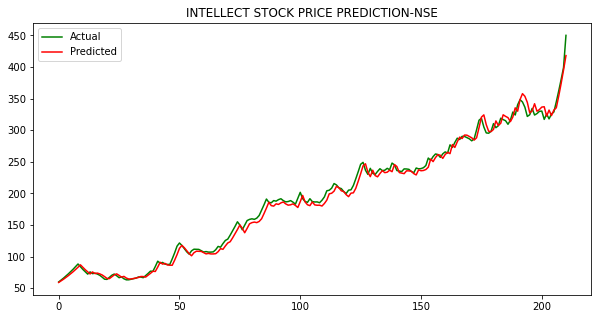

In [148]:
plt.figure(figsize=(10,5))
plt.title('INTELLECT STOCK PRICE PREDICTION-NSE')
plt.plot(y_test , label = 'Actual', color = 'g')
plt.plot(y_pred , label = 'Predicted', color = 'r')
plt.legend()
